11 features group covering 518 languages

    quality index: 3.82
    dim1: 7%
    dim2: 7%
    fields: 'phonology': 11
    features:

    11A Front Rounded Vowels
    13A Tone
    18A Absence of Common Consonants
    19A Presence of Uncommon Consonants
    1A Consonant Inventories
    2A Vowel Quality Inventories
    4A Voicing in Plosives and Fricatives
    5A Voicing and Gaps in Plosive Systems
    6A Uvular Consonants
    7A Glottalized Consonants
    8A Lateral Consonants

    family1: 53 (Niger-Congo),
    family2: 42 (Austronesian),
    best separation: 0.45 (on one dimension)


In [11]:
library(FactoMineR)

In [13]:
family <- function(fams) {
    function(fam) {
        if (fam %in% fams) as.character(fam) else 'other'
    }
}

top2mca <-function(data,fams) {
    data$X <- NULL
    data$family <-  as.factor(sapply(data$family,family(fams)))
    ans <- list(
        'data' = data, 
        'marked' = which(data$family %in% fams),
        'mca' = MCA(data,quali.sup=1:7)
    )
    ans
}
example1 <- read.csv("../miscsv/good11-with-clust.csv")
example1[0:5,]

X,kmpredict.2.1,kmpredict.2.raw,kmpredict.3.4,kmpredict.3.raw,Name,genus,family,X11A,X13A,X18A,X19A,X1A,X2A,X4A,X5A,X6A,X7A,X8A
8,other,other,other,other,Abkhaz,Northwest Caucasian,Northwest Caucasian,1 None,1 No tones,1 All present,4 Pharyngeals,5 Large,1 Small (2-4),4 In both plosives and fricatives,2 None missing in /p t k b d g/,2 Uvular stops only,2 Ejectives only,"2 /l/, no obstruent laterals"
21,other,other,other,other,Achumawi,Palaihnihan,Hokan,1 None,2 Simple tone system,1 All present,1 None,2 Moderately small,2 Average (5-6),1 No voicing contrast,1 Other,4 Uvular stops and continuants,1 No glottalized consonants,"2 /l/, no obstruent laterals"
23,other,other,other,other,Acoma,Keresan,Keresan,1 None,3 Complex tone system,1 All present,5 'Th' sounds,5 Large,2 Average (5-6),1 No voicing contrast,1 Other,1 None,6 Ejectives and glottalized resonants,1 No laterals
28,other,other,other,other,Andoke,Andoke,Andoke,1 None,2 Simple tone system,4 No nasals,1 None,1 Small,3 Large (7-14),2 In plosives alone,4 Missing /g/,1 None,1 No glottalized consonants,1 No laterals
33,other,other,other,other,Aleut (Eastern),Aleut,Eskimo-Aleut,1 None,1 No tones,1 All present,5 'Th' sounds,3 Average,1 Small (2-4),3 In fricatives alone,1 Other,4 Uvular stops and continuants,1 No glottalized consonants,"2 /l/, no obstruent laterals"


In [3]:
mca1 <- top2mca(example1,c('Austronesian','Niger-Congo'))

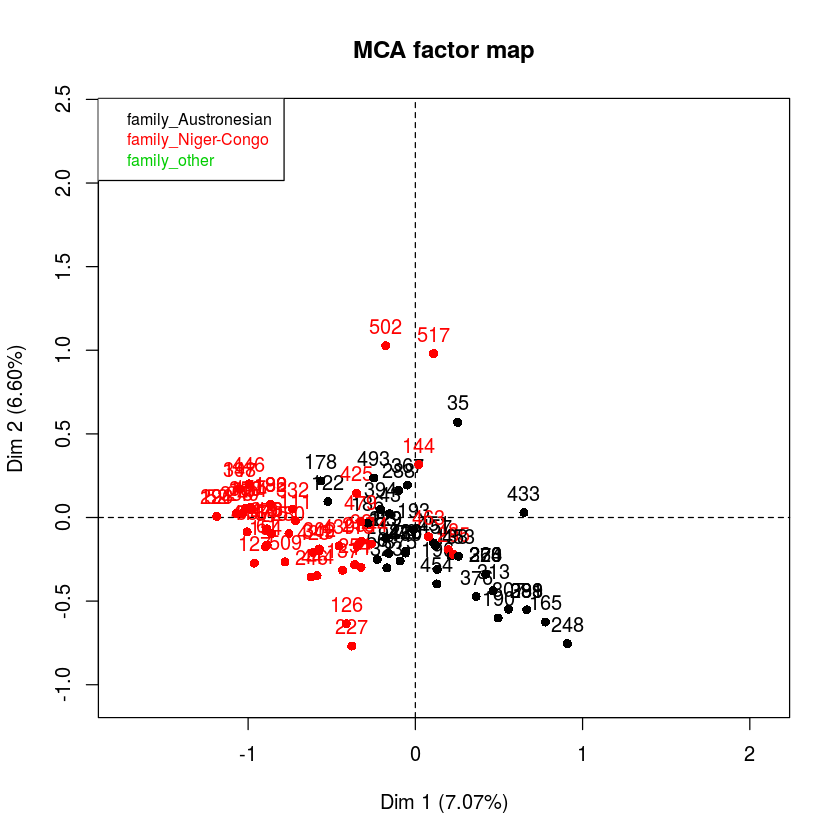

In [4]:
plot(mca1$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca1$marked,unselect=1)

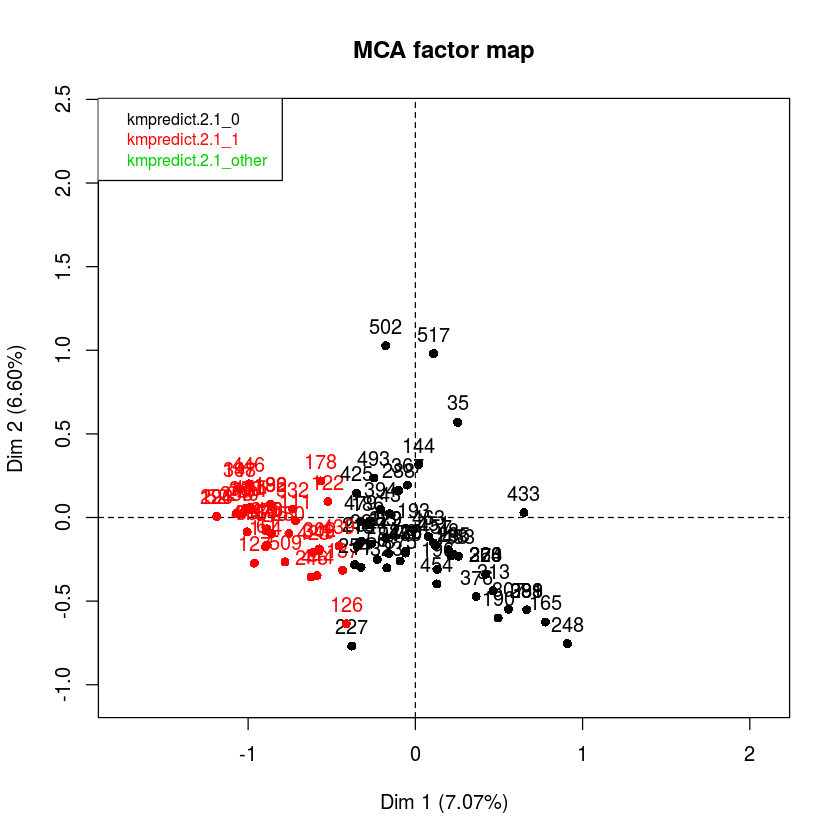

In [5]:
plot(mca1$mca,choix="ind",habillage="kmpredict.2.1",invisible=c("var","quali.sup"),select=mca1$marked,unselect=1)

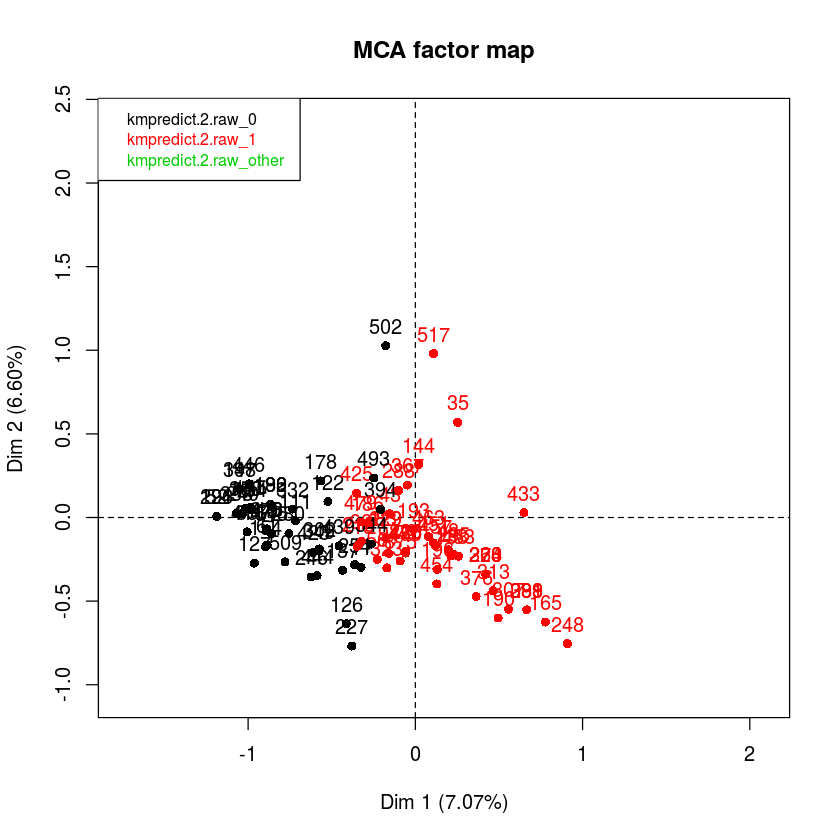

In [6]:
plot(mca1$mca,choix="ind",habillage="kmpredict.2.raw",invisible=c("var","quali.sup"),select=mca1$marked,unselect=1)

In [7]:
mca2 <- top2mca(example1,c('Austronesian','Niger-Congo','Indo-European'))

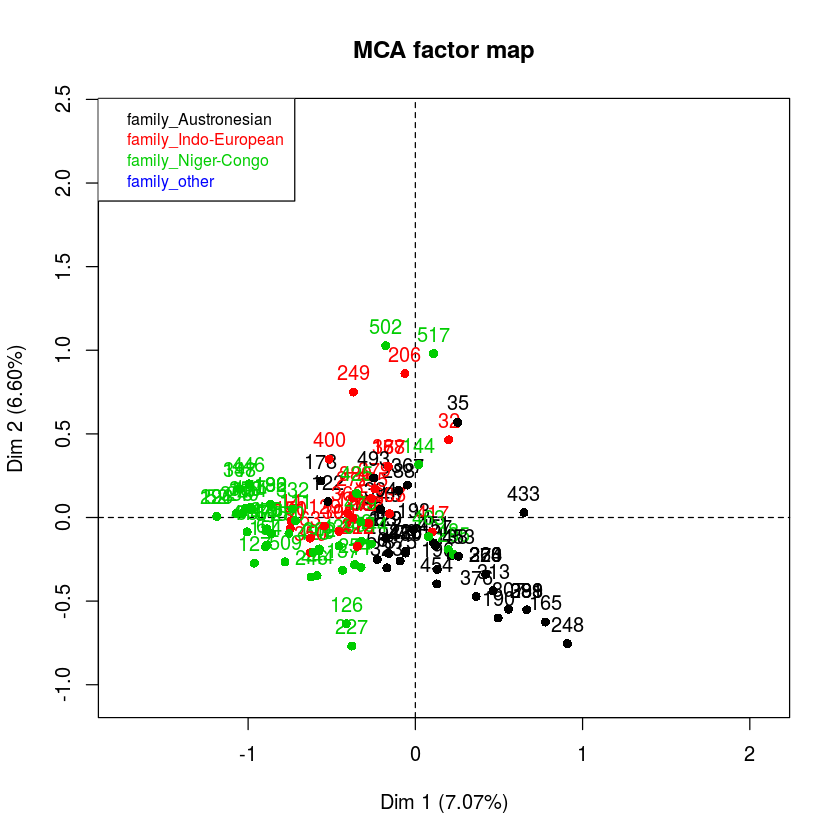

In [8]:
plot(mca2$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca2$marked,unselect=1)

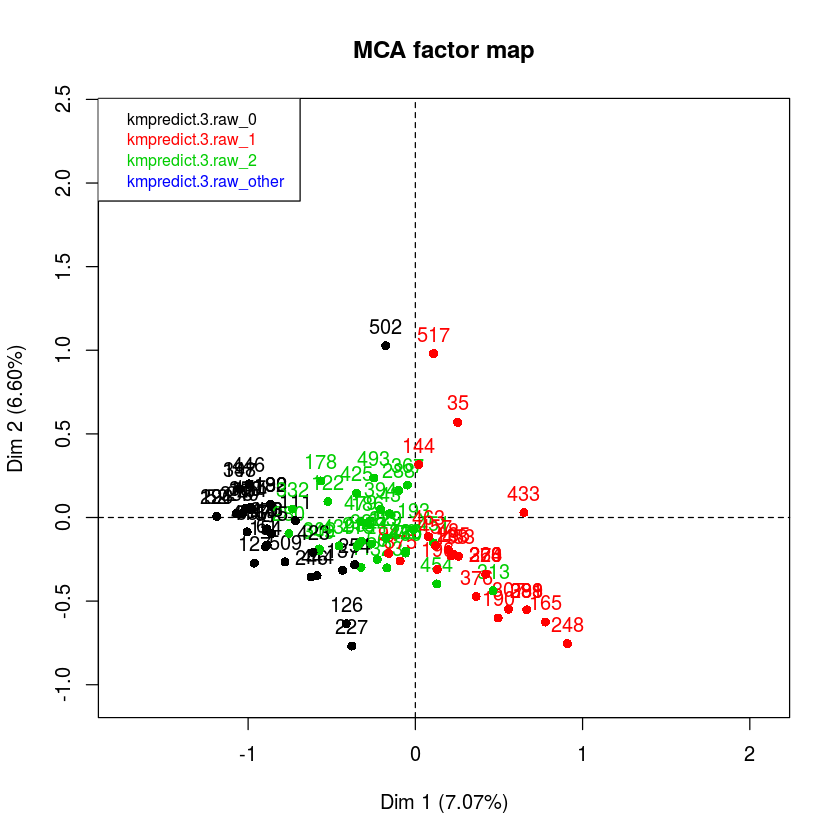

In [9]:
plot(mca1$mca,choix="ind",habillage="kmpredict.3.raw",invisible=c("var","quali.sup"),select=mca1$marked,unselect=1)

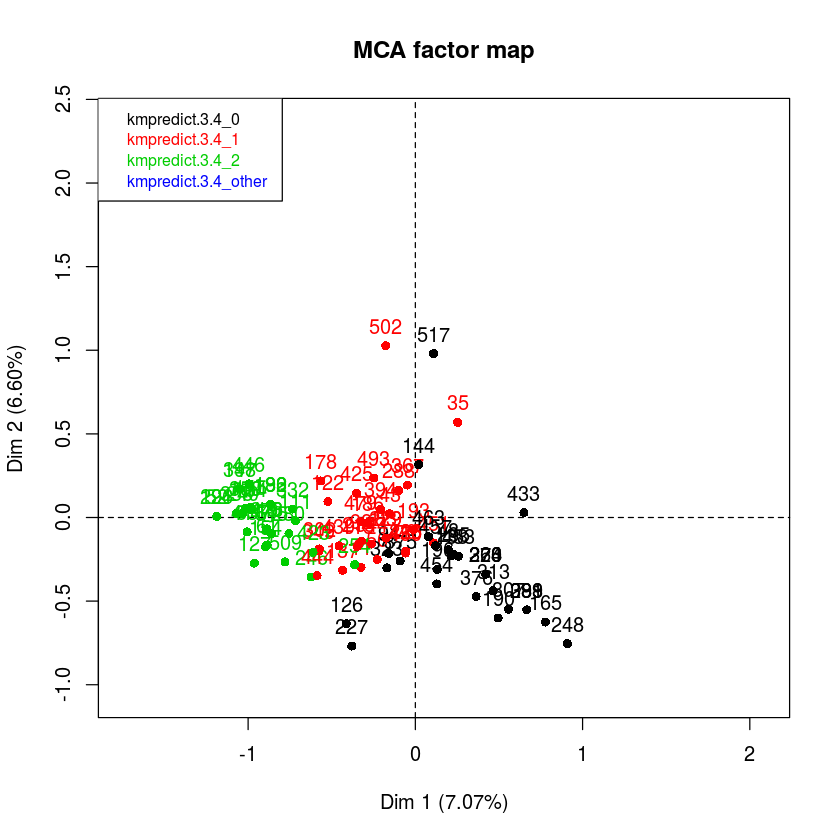

In [10]:
plot(mca1$mca,choix="ind",habillage="kmpredict.3.4",invisible=c("var","quali.sup"),select=mca1$marked,unselect=1)

## Correlation Between pre-MCA and post-MCA Silhouettes

In [1]:
silhouettes <- read.csv("../miscsv/1000-sils-unrestricted.csv")

In [15]:
silhouettes[0:5,]
dim(silhouettes)

X,best,euc,hamming,qindices
0,0.15497961,0.13214524,0.15497961,2.426226
1,0.17866344,0.13556664,0.15703951,2.303606
2,0.14648215,0.12555927,0.14251119,2.402055
3,0.08008482,0.06905245,0.08008482,2.029461
4,0.22651415,0.15768381,0.19803443,2.343465


[1] 1136    5

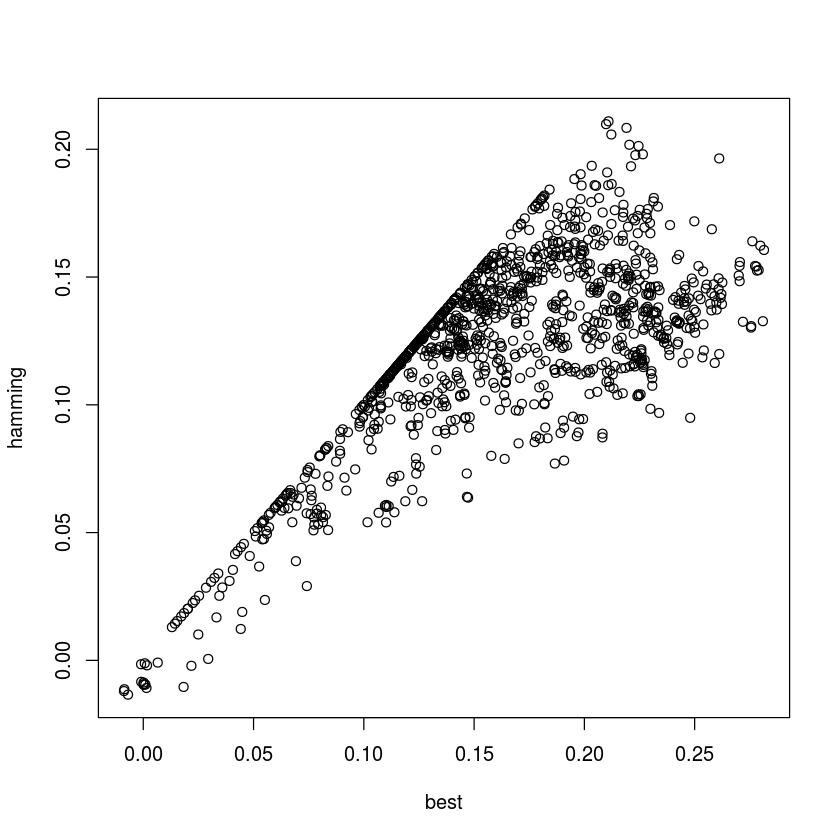

In [6]:
with(silhouettes,plot(best,hamming))

In [7]:
cor(silhouettes$best,silhouettes$hamming)

[1] 0.7327135

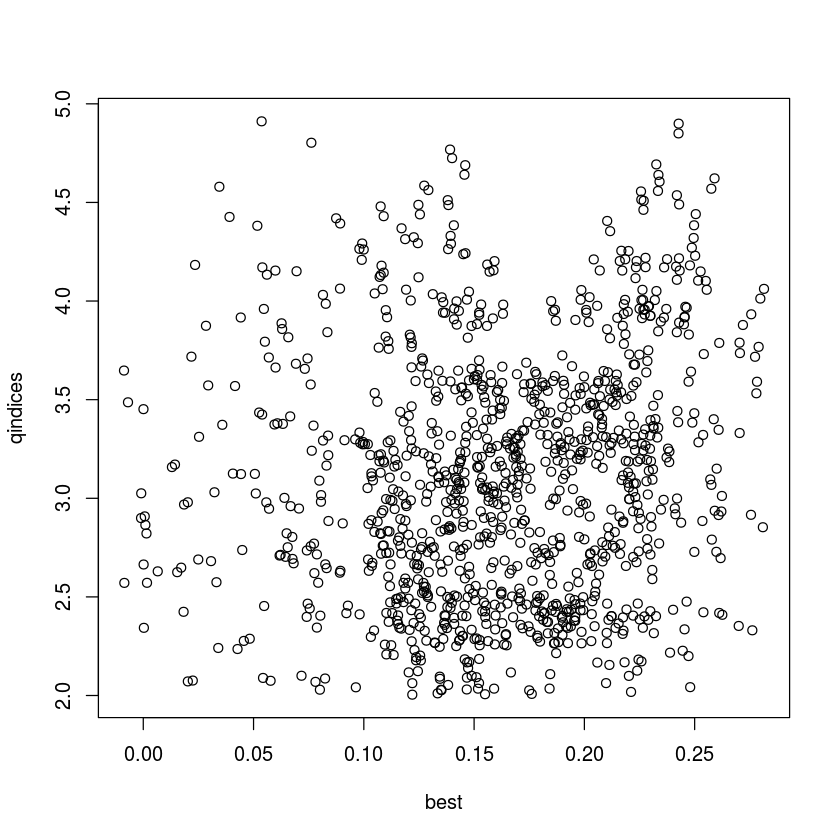

In [16]:
with(silhouettes,plot(best,qindices))

3 long group covering 609 languages
quality index: 3.34
dim1: 15%
dim2: 10%
fields: 'word_order': 3
features:
143A Order of Negative Morpheme and Verb
143F Postverbal Negative Morphemes
144B Position of negative words relative to beginning and end of clause and with respect to adjacency to verb
family1: 114 (Austronesian), 
family2: 70 (Niger-Congo), 
separation: 0.26


In [24]:
example3 <- read.csv("just-negation-best-silhouettes.csv")
example3$X <- NULL
example3$family <-  as.factor(sapply(example3$family,family(c('Austronesian','Niger-Congo')))) 
knownids = which(example3$family %in% c('Austronesian','Niger-Congo'))
mca3 = MCA(example3,quali.sup=1:10)

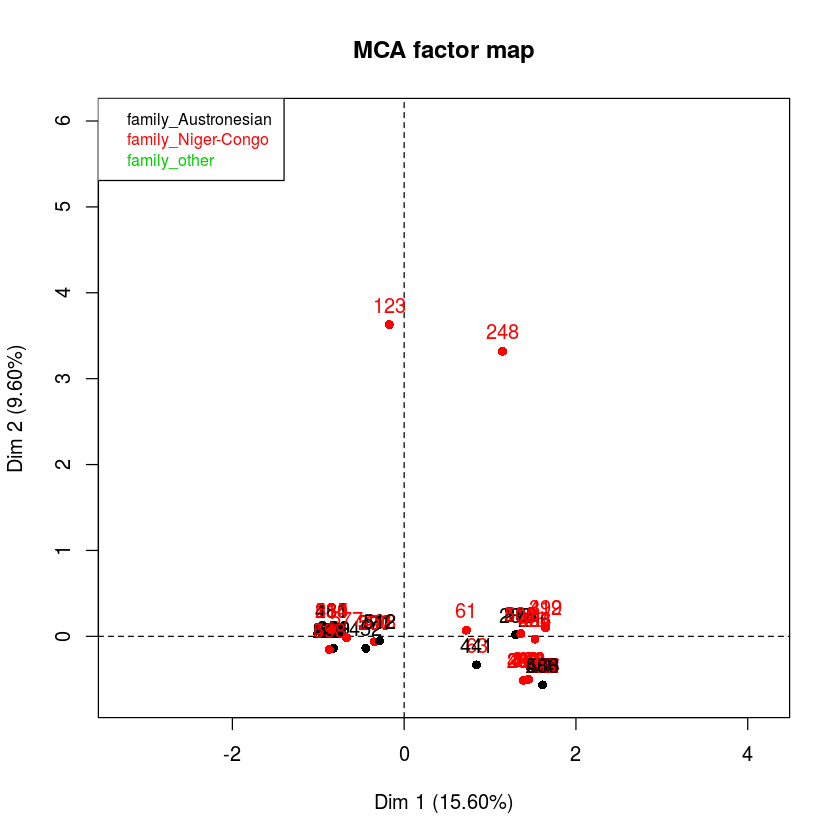

In [25]:
plot(mca3,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=knownids,unselect=1)

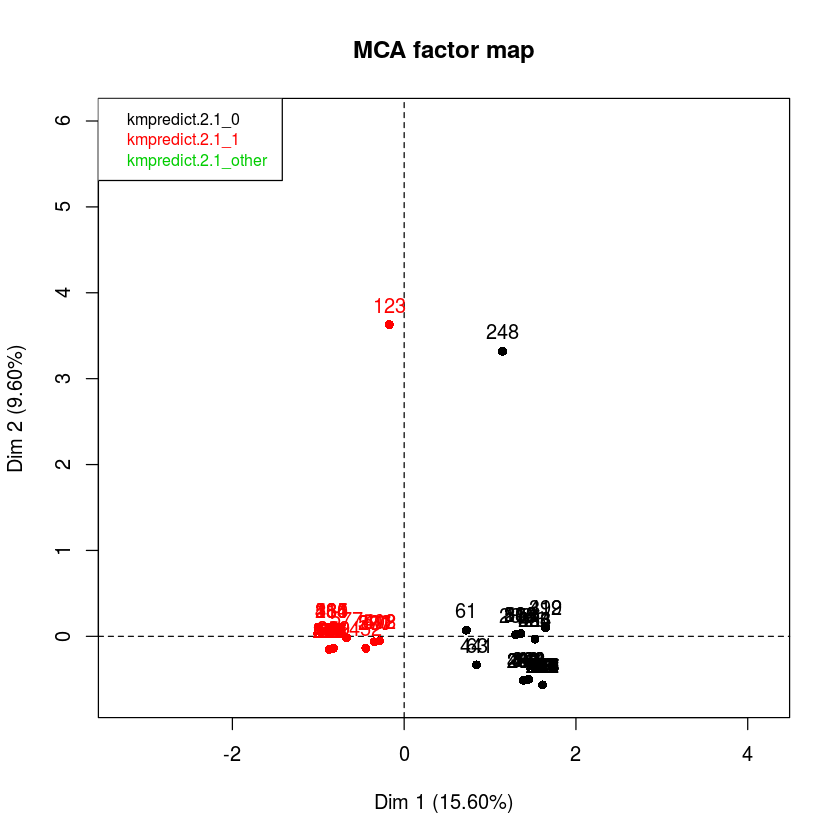

In [26]:
plot(mca3,choix="ind",habillage="kmpredict.2.1",invisible=c("var","quali.sup"),select=knownids,unselect=1)

In [30]:
example3[c(61,248,123),]

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,X143A,X143F,X144B,kmpredict.2.1
61,ble,bci,baou1238,Baule,7.000000,-5.00000,Kwa,Niger-Congo,Africa,CI,14 ObligDoubleNeg,4 None,4 Immed postverbal,0
248,kon,kng,koon1244,Kongo,-5.000000,15.00000,Bantoid,Niger-Congo,Africa,CD,16 OptTripleNeg&ObligDoubleNeg,3 VNeg&[V-Neg],"6 End, not immed postverbal",0
123,doy,dow,doya1240,Doyayo,8.666667,13.08333,Adamawa,Niger-Congo,Africa,CM,16 OptTripleNeg&ObligDoubleNeg,3 VNeg&[V-Neg],3 Immed preverbal,1
